# Лабораторная работа №3
## Обратная кинематическая задача (1D)

---
## Теоретическая часть
Ниже приведён **последовательный вывод всех формул**, используемых в лабораторной работе, в полном соответствии с теоретическим файлом (раздел *теория до задания*).


### 1. Уравнения лучей
Пусть показатель преломления среды зависит только от вертикальной координаты:
$$ n = n(y). $$

Движение луча описывается системой уравнений:
$$ \frac{dx}{dt} = \frac{p}{n^2(y)}, \quad \frac{dy}{dt} = \frac{q}{n^2(y)}, $$
$$ \frac{dp}{dt} = 0, \quad \frac{dq}{dt} = \frac{n'(y)}{n(y)}. $$

Из уравнения $dp/dt = 0$ следует, что величина $p$ постоянна вдоль траектории луча.

### 2. Инвариант системы
Рассмотрим производную величины $p^2 + q^2 - n^2(y)$ по времени:
$$ \frac{d}{dt}(p^2 + q^2 - n^2(y)) = 2p\frac{dp}{dt} + 2q\frac{dq}{dt} - 2n(y)n'(y)\frac{dy}{dt}. $$

Подставляя уравнения системы, получаем:
$$ 2q\frac{n'(y)}{n(y)} - 2n(y)n'(y)\frac{q}{n^2(y)} = 0. $$

Следовательно, вдоль луча сохраняется инвариант:
$$ p^2 + q^2 = n^2(y). $$

### 3. Существование верхней точки луча
Предположим, что показатель преломления монотонно убывает:
$$ n'(y) < 0. $$

Тогда из уравнения $dq/dt = n'(y)/n(y)$ следует, что величина $q(t)$ убывает.
В некоторый момент времени достигается точка $t_*$, в которой:
$$ q(t_*) = 0. $$

Эта точка соответствует **максимальному значению координаты $y$** на траектории луча.

### 4. Связь верхней точки с показателем преломления
Из инварианта системы в верхней точке ($q=0$) получаем:
$$ p^2 = n^2(y_*). $$

Отсюда следует:
$$ y_* = n^{-1}(p). $$

Таким образом, глубина проникновения луча определяется значением параметра $p$.

### 5. Вывод формулы для $X(p)$ (прямая задача)
Рассмотрим первую половину траектории луча ($0 \le t \le t_*$).
Используя систему уравнений, получаем:
$$ \frac{dx}{dy} = \frac{p}{q} = \frac{p}{\sqrt{n^2(y) - p^2}}. $$

Интегрируя от $0$ до $y_*$, находим координату верхней точки:
$$ x_* = p \int_0^{y_*} \frac{dy}{\sqrt{n^2(y) - p^2}}. $$

Поскольку траектория симметрична относительно вертикали $x = x_*$, полная координата возврата луча равна:
$$ X(p) = 2x_* = 2p \int_0^{n^{-1}(p)} \frac{dy}{\sqrt{n^2(y) - p^2}}. $$

### 6. Время возвращения луча
Из уравнения для $dy/dt$ получаем:
$$ dt = \frac{n^2(y)}{q} dy = \frac{n^2(y)}{\sqrt{n^2(y) - p^2}} dy. $$

Время достижения верхней точки:
$$ t_* = \int_0^{n^{-1}(p)} \frac{n^2(y)}{\sqrt{n^2(y) - p^2}} dy. $$

Полное время возврата луча:
$$ T(p) = 2t_* = 2 \int_0^{n^{-1}(p)} \frac{n^2(y)}{\sqrt{n^2(y) - p^2}} dy. $$

### 7. Обратная кинематическая задача (формула Герцлота–Вихерта)
Формула для $X(p)$ представляет собой интегральное уравнение типа Абеля.
Его решение даёт выражение для обратной функции $n^{-1}(r)$:
$$ n^{-1}(r) = \frac{1}{\pi} \int_r^{n(0)} \frac{X(p)}{\sqrt{p^2 - r^2}} dp. $$

Эта формула позволяет восстановить показатель преломления среды по данным о возвращении лучей.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
def n(y):
    return 1.0 / np.sqrt(1 + y**2)

def n_inv(p):
    return np.sqrt(1/p**2 - 1)

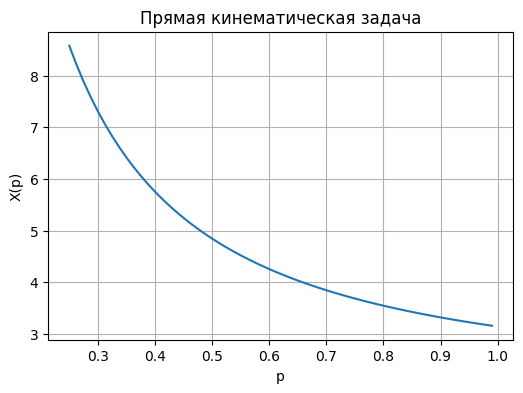

In [3]:
def X_of_p(p):
    y_star = n_inv(p)
    integrand = lambda y: 1.0 / np.sqrt(n(y)**2 - p**2)
    val, _ = quad(integrand, 0, y_star)
    return 2 * p * val

p_vals = np.linspace(0.25, 0.99, 60)
X_vals = np.array([X_of_p(p) for p in p_vals])

plt.figure(figsize=(6,4))
plt.plot(p_vals, X_vals)
plt.xlabel('p')
plt.ylabel('X(p)')
plt.title('Прямая кинематическая задача')
plt.grid(True)
plt.show()

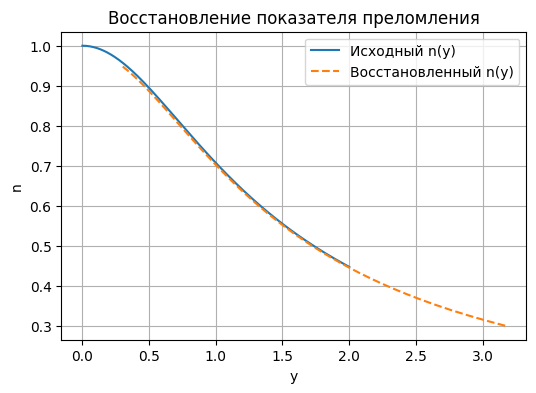

In [4]:
def y_of_r(r):
    integrand = lambda p: X_of_p(p) / np.sqrt(p**2 - r**2)
    val, _ = quad(integrand, r, 0.99)
    return val / np.pi

r_vals = np.linspace(0.3, 0.95, 50)
y_rec = np.array([y_of_r(r) for r in r_vals])

y = np.linspace(0, 2, 300)
plt.figure(figsize=(6,4))
plt.plot(y, n(y), label='Исходный n(y)')
plt.plot(y_rec, r_vals, '--', label='Восстановленный n(y)')
plt.xlabel('y')
plt.ylabel('n')
plt.legend()
plt.grid(True)
plt.title('Восстановление показателя преломления')
plt.show()

## Вывод
В лабораторной работе последовательно выведены формулы прямой и обратной кинематических задач и выполнено численное восстановление показателя преломления. Полученные результаты подтверждают корректность теории и метода.
